# Linear Algebra (Credit card fraud detection)

Please download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not

Task 1: please do proper analysis of the whole data, plot all relevant plots, note down all observations.

Task 2: Let's define a matric

similarity(i,j) = dot product (vi, vj) / length(vi) * length(vj)
Take out any sample from the data set which contains no less than 100 transactions, for every transaction in the sample find out top 10 transactions in the dataset which have the highest similarity(i,j).

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os 


In [3]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content
total 20K
drwxr-xr-x 1 root root 4.0K Jun  4 17:20 .
drwxr-xr-x 1 root root 4.0K Jun  4 17:16 ..
drwxr-xr-x 1 root root 4.0K Jun  2 16:14 .config
drwx------ 4 root root 4.0K Jun  4 17:20 gdrive
drwxr-xr-x 1 root root 4.0K May 29 18:19 sample_data


In [0]:
os.chdir("/content/gdrive/My Drive/CreditCard")

In [5]:
!wc -l creditcard.csv


284808 creditcard.csv


In [6]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content/gdrive/My Drive/CreditCard
total 144M
-rw------- 1 root root 144M Feb 29 08:20 creditcard.csv


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "/content/gdrive/My Drive/CreditCard/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Information about data set**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

In [9]:
print(creditcard.shape)

(284807, 31)


In [10]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [0]:
## check null values 
print (f'Number if the records = {creditcard.shape[0]}')
pd.isnull(creditcard).sum()

In [12]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
## the data is highly unbalanced
positive =  creditcard[creditcard.Class == 1]
positive_cnt = positive.shape[0]

negative =  creditcard[creditcard.Class == 0]
negative_cnt = negative.shape[0]

fruad_pct= positive_cnt / (positive_cnt  + negative_cnt )
print(f'records count = {creditcard.shape[0]} , fruad records = {positive_cnt} ,  the positive class (frauds) {round(fruad_pct*100,3)}%')


records count = 284807 , fruad records = 492 ,  the positive class (frauds) 0.173%


In [0]:
creditcard.head

## 2-D Scatter Plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


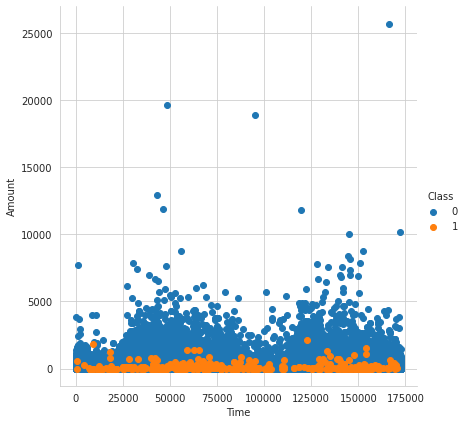

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

## 3D Scatter plot

In [0]:
FilteredData = creditcard[['Time','Amount', 'Class']]

In [0]:
FilteredData

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [0]:
print(FilteredData.shape)

(284807, 3)


In [0]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

In [0]:
countLess = 0
countMore= 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print(countLess)
print(countMore)

284357
449


In [0]:
percentage = (countLess/284807)*100
percentage

99.84199826549207

Observations:

Now it has been calculated that there are 284357 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500

In [0]:
class0 = 0
class1 = 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        if(FilteredData.iloc[i]["Class"] == 0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        
print(class0)
print(class1)

283865
492


In [0]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Observations:

Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.  

## Histogram, PDF and CDF

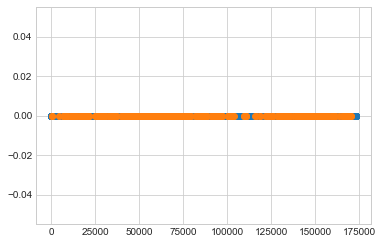

In [0]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

Observations:

Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.

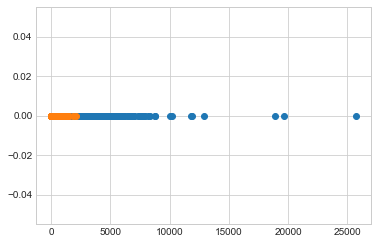

In [0]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

Observations:

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 2500.

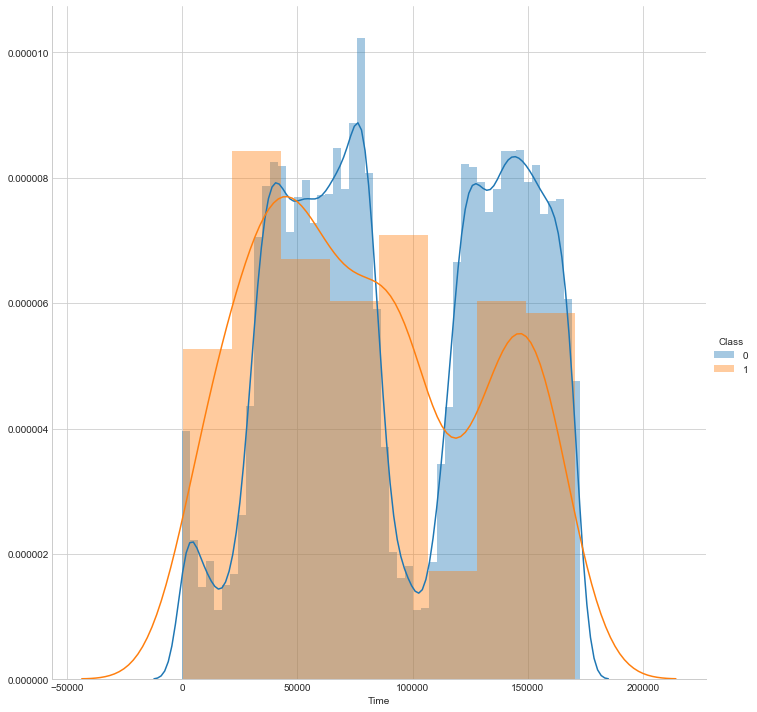

In [0]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

Observations:

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

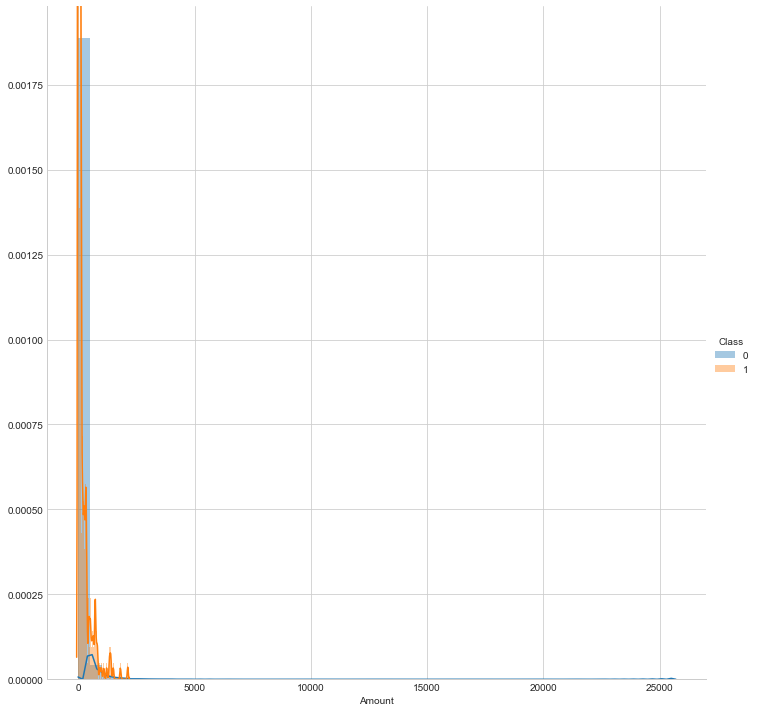

In [0]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

Observations:

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

**Hence, this is the best histogram we have**

pdf =  [9.98553406e-01 1.26401388e-03 1.26401388e-04 3.51114966e-05
 7.02229931e-06 3.51114966e-06 0.00000000e+00 7.02229931e-06
 0.00000000e+00 3.51114966e-06]


Counts = [3.88675874e-04 4.92003427e-07 4.92003427e-08 1.36667619e-08
 2.73335237e-09 1.36667619e-09 0.00000000e+00 2.73335237e-09
 0.00000000e+00 1.36667619e-09]


Bin edges =  [    0.     2569.116  5138.232  7707.348 10276.464 12845.58  15414.696
 17983.812 20552.928 23122.044 25691.16 ]


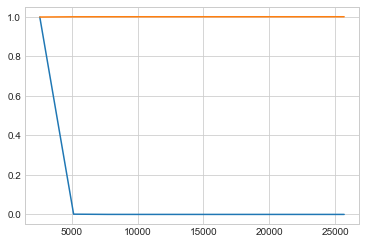

In [0]:
counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

Observations:

Probability of the points having transaction amount approximately less than 2500 is 1, it means almost all of the transactions have transaction amount less than 2500 and cdf curve verifies this fact.

# Mean, Variance and Std-dev

In [0]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.29102242225574
Mean of transaction amount of fraud transactions:  122.21132113821133


In [0]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  250.1046523874637
Std-Deviation of transaction amount of fraud transactions:  256.42229861324483


In [0]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  9.25


In [0]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.65 22.   77.05]
[  0.     1.     9.25 105.89]


# Box plot and Whiskers

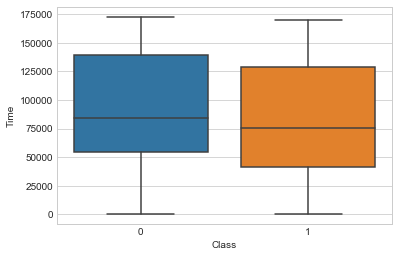

In [0]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

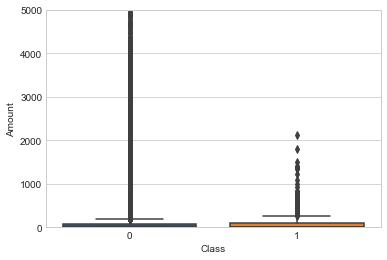

In [0]:
sns.boxplot(x = "Class", y = "Amount", data = creditcard)
plt.ylim(0, 5000)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

# Similarity

In [0]:
from scipy import spatial

In [0]:
sampleData = creditcard.head(20000)   #Sample the data from original data so as to save the computation time.

In [0]:
samples = creditcard.loc[30401:30500]    #Taking sample of size 100 from index 30401 to 30500.

In [0]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [0]:
frame = []

In [0]:
for i in range(30401, 30501):
    t1 = samples.loc[i]
    c = samples.loc[i]["Class"]
    for j in range(20000):
        t2 = sampleData.loc[j]
        classLabel = creditcard.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        frame.append([classLabel, similarity, j])
        
    df = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = df.sort_values("Similarity", ascending=False)
    print("Top 10 transactions having highest similarity with transaction ID = "+str(i)+" and class = "+str(c)+":")
    print(df_sorted.iloc[:10])
    print("\n")
    frame = []

Top 10 transactions having highest similarity with transaction ID = 30401 and class = 0.0:
       Class  Similarity  Transaction ID
21501    0.0         1.0           16709
23546    0.0         1.0           18754
20632    0.0         1.0           15840
21046    0.0         1.0           16254
23378    0.0         1.0           18586
21420    0.0         1.0           16628
23230    0.0         1.0           18438
22838    0.0         1.0           18046
20738    0.0         1.0           15946
19596    0.0         1.0           14804


Top 10 transactions having highest similarity with transaction ID = 30402 and class = 0.0:
       Class  Similarity  Transaction ID
19040    0.0         1.0           19040
16720    0.0         1.0           16720
18994    0.0         1.0           18994
19142    0.0         1.0           19142
15480    0.0         1.0           15480
17628    0.0         1.0           17628
17591    0.0         1.0           17591
17876    0.0         1.0           17

Top 10 transactions having highest similarity with transaction ID = 30417 and class = 0.0:
       Class  Similarity  Transaction ID
18282    0.0         1.0           18282
16276    0.0         1.0           16276
19010    0.0         1.0           19010
19241    0.0         1.0           19241
14453    0.0         1.0           14453
16129    0.0         1.0           16129
17456    0.0         1.0           17456
19496    0.0         1.0           19496
16235    0.0         1.0           16235
16518    0.0         1.0           16518


Top 10 transactions having highest similarity with transaction ID = 30418 and class = 0.0:
       Class  Similarity  Transaction ID
18914    0.0         1.0           18914
19552    0.0         1.0           19552
16206    0.0         1.0           16206
14957    0.0         1.0           14957
16093    0.0         1.0           16093
16156    0.0         1.0           16156
18677    0.0         1.0           18677
18012    0.0         1.0           18

Top 10 transactions having highest similarity with transaction ID = 30433 and class = 0.0:
       Class  Similarity  Transaction ID
19807    0.0         1.0           19807
16918    0.0         1.0           16918
16914    0.0         1.0           16914
16462    0.0         1.0           16462
16115    0.0         1.0           16115
15791    0.0         1.0           15791
16998    0.0         1.0           16998
18753    0.0         1.0           18753
17769    0.0         1.0           17769
18618    0.0         1.0           18618


Top 10 transactions having highest similarity with transaction ID = 30434 and class = 0.0:
       Class  Similarity  Transaction ID
18452    0.0         1.0           18452
17930    0.0         1.0           17930
19659    0.0         1.0           19659
16395    0.0         1.0           16395
18709    0.0         1.0           18709
15126    0.0         1.0           15126
16883    0.0         1.0           16883
15483    0.0         1.0           15

Top 10 transactions having highest similarity with transaction ID = 30449 and class = 0.0:
       Class  Similarity  Transaction ID
19548    0.0         1.0           19548
15247    0.0         1.0           15247
16746    0.0         1.0           16746
16879    0.0         1.0           16879
17181    0.0         1.0           17181
15377    0.0         1.0           15377
19196    0.0         1.0           19196
18363    0.0         1.0           18363
18478    0.0         1.0           18478
18086    0.0         1.0           18086


Top 10 transactions having highest similarity with transaction ID = 30450 and class = 0.0:
       Class  Similarity  Transaction ID
15922    0.0         1.0           15922
17232    0.0         1.0           17232
17178    0.0         1.0           17178
17344    0.0         1.0           17344
17252    0.0         1.0           17252
17791    0.0         1.0           17791
14329    0.0         1.0           14329
14459    0.0         1.0           14

Top 10 transactions having highest similarity with transaction ID = 30465 and class = 0.0:
       Class  Similarity  Transaction ID
19761    0.0         1.0           19761
17254    0.0         1.0           17254
17341    0.0         1.0           17341
17802    0.0         1.0           17802
19045    0.0         1.0           19045
17781    0.0         1.0           17781
17489    0.0         1.0           17489
16904    0.0         1.0           16904
15541    0.0         1.0           15541
17919    0.0         1.0           17919


Top 10 transactions having highest similarity with transaction ID = 30466 and class = 0.0:
       Class  Similarity  Transaction ID
14858    0.0         1.0           14858
19062    0.0         1.0           19062
14586    0.0         1.0           14586
15844    0.0         1.0           15844
18020    0.0         1.0           18020
15495    0.0         1.0           15495
14414    0.0         1.0           14414
19247    0.0         1.0           19

Top 10 transactions having highest similarity with transaction ID = 30481 and class = 0.0:
       Class  Similarity  Transaction ID
18704    0.0         1.0           18704
18874    0.0         1.0           18874
19889    0.0         1.0           19889
16884    0.0         1.0           16884
18877    0.0         1.0           18877
17423    0.0         1.0           17423
16162    0.0         1.0           16162
17926    0.0         1.0           17926
19859    0.0         1.0           19859
17812    0.0         1.0           17812


Top 10 transactions having highest similarity with transaction ID = 30482 and class = 0.0:
       Class  Similarity  Transaction ID
19232    0.0         1.0           19232
16614    0.0         1.0           16614
15093    0.0         1.0           15093
16322    0.0         1.0           16322
13159    0.0         1.0           13159
17892    0.0         1.0           17892
13125    0.0         1.0           13125
17068    0.0         1.0           17

Top 10 transactions having highest similarity with transaction ID = 30497 and class = 0.0:
       Class  Similarity  Transaction ID
16671    0.0         1.0           16671
14875    0.0         1.0           14875
17632    0.0         1.0           17632
19007    0.0         1.0           19007
17244    0.0         1.0           17244
18109    0.0         1.0           18109
15270    0.0         1.0           15270
15972    0.0         1.0           15972
19747    0.0         1.0           19747
18473    0.0         1.0           18473


Top 10 transactions having highest similarity with transaction ID = 30498 and class = 0.0:
       Class  Similarity  Transaction ID
16671    0.0         1.0           16671
15229    0.0         1.0           15229
14604    0.0         1.0           14604
19665    0.0         1.0           19665
18906    0.0         1.0           18906
14908    0.0         1.0           14908
19747    0.0         1.0           19747
19998    0.0         1.0           19